In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

# CIFAR-10 데이터셋 불러오기
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# CIFAR-10 클래스
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 데이터 확인
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels)


Files already downloaded and verified
Files already downloaded and verified
torch.Size([4, 3, 32, 32])
tensor([0, 1, 3, 0])


50000
torch.Size([3, 32, 32]) 6


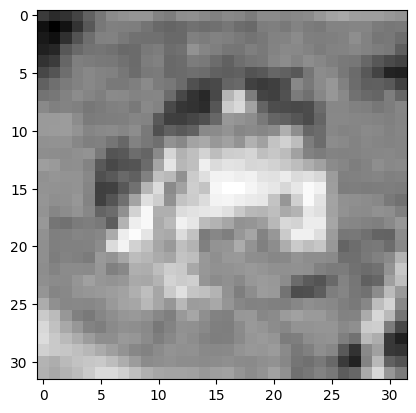

In [3]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [4]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=256, shuffle=True)

Files already downloaded and verified


In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([256, 3, 32, 32]) torch.Size([256])


In [6]:
import torch
import torch.nn as nn
from torch.optim import Adam

# Model 클래스 정의
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 입력층 -> 은닉층
        self.leaky_relu1 = nn.LeakyReLU(negative_slope=0.01)  # LeakyReLU 활성화 함수
        self.fc2 = nn.Linear(hidden_size, output_size)  # 은닉층 -> 출력층
        self.leaky_relu2 = nn.LeakyReLU(negative_slope=0.01)  # LeakyReLU 활성화 함수

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 28x28 이미지 -> 1차원 벡터로 변환
        x = self.fc1(x)  # 첫 번째 레이어 적용
        x = self.leaky_relu1(x)  # 첫 번째 LeakyReLU 적용
        x = self.fc2(x)  # 두 번째 레이어 적용
        x = self.leaky_relu2(x)  # 두 번째 LeakyReLU 적용
        return x

# 모델 초기화
input_size = 28 * 28  
hidden_size = 1024  # 은닉층 크기
output_size = 10  

model = Model(input_size, hidden_size, output_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # Cross-Entropy 손실 함수
optimizer = Adam(model.parameters(), lr=0.001)  # Adam 옵티마이저

# 학습 데이터 및 라벨 예시 (임의로 생성된 데이터)
data = torch.randn(64, 1, 28, 28)  # 배치 크기 64, 28x28 이미지
target = torch.randint(0, 10, (64,))  # 0~9 사이의 정수로 된 라벨 (64개의 샘플)

# 학습 과정
n_epochs = 50  # 학습 반복 횟수

for epoch in range(n_epochs):
    # Forward 패스: 모델 출력 계산
    output = model(data)
    
    # 손실 계산
    loss = criterion(output, target)
    
    # 모델 학습 과정
    optimizer.zero_grad()  # 기존의 그라디언트를 초기화
    loss.backward()  # 손실 함수에 대한 그라디언트 계산
    optimizer.step()  # 모델 매개변수 업데이트
    
    # 예측 정확도 계산
    _, predicted = torch.max(output, 1)  # 가장 높은 값의 인덱스를 예측 값으로 선택
    correct = (predicted == target).sum().item()  # 맞춘 개수
    accuracy = correct / target.size(0)  # 정확도 계산
    
    # 에포크마다 손실과 정확도 출력
    print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')


Epoch [1/50], Loss: 2.3433, Accuracy: 3.12%
Epoch [2/50], Loss: 1.6497, Accuracy: 62.50%
Epoch [3/50], Loss: 1.2159, Accuracy: 65.62%
Epoch [4/50], Loss: 0.9816, Accuracy: 65.62%
Epoch [5/50], Loss: 0.8720, Accuracy: 67.19%
Epoch [6/50], Loss: 0.8126, Accuracy: 71.88%
Epoch [7/50], Loss: 0.7577, Accuracy: 71.88%
Epoch [8/50], Loss: 0.6912, Accuracy: 78.12%
Epoch [9/50], Loss: 0.6135, Accuracy: 78.12%
Epoch [10/50], Loss: 0.5336, Accuracy: 82.81%
Epoch [11/50], Loss: 0.4576, Accuracy: 87.50%
Epoch [12/50], Loss: 0.3807, Accuracy: 90.62%
Epoch [13/50], Loss: 0.3086, Accuracy: 93.75%
Epoch [14/50], Loss: 0.2430, Accuracy: 93.75%
Epoch [15/50], Loss: 0.1937, Accuracy: 93.75%
Epoch [16/50], Loss: 0.1468, Accuracy: 96.88%
Epoch [17/50], Loss: 0.1100, Accuracy: 96.88%
Epoch [18/50], Loss: 0.0779, Accuracy: 98.44%
Epoch [19/50], Loss: 0.0474, Accuracy: 100.00%
Epoch [20/50], Loss: 0.0234, Accuracy: 100.00%
Epoch [21/50], Loss: 0.0096, Accuracy: 100.00%
Epoch [22/50], Loss: 0.0037, Accuracy: 10

In [23]:



# Model 클래스 정의
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 입력층 -> 은닉층
        self.fc2 = nn.Linear(hidden_size, output_size)  # 은닉층 -> 출력층
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)  # LeakyReLU 활성화 함수
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # 32x32x3 이미지 -> 1차원 벡터로 변환
        x = self.fc1(x)  # 첫 번째 레이어 적용
        x = self.leaky_relu(x)  # LeakyReLU 활성화 함수 적용
        x = self.fc2(x)  # 두 번째 레이어 적용
        return x

# 모델 초기화
input_size = 32 * 32 * 3  # CIFAR-10 이미지 크기
hidden_size = 1024  # 은닉층 크기
output_size = 10  # CIFAR-10 클래스 수

model = Model(input_size, hidden_size, output_size)

In [24]:
def accuracy(model, dataloader):
    correct = 0
    total = 0
    model.eval()  # 평가 모드로 설정
    
    with torch.no_grad():  # 추론 시에는 기울기 계산을 하지 않음
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to('cpu'), labels.to('cpu')

            outputs = model(inputs)
            
            # outputs에서 가장 높은 값을 가진 클래스 선택
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total  # 정확도 반환

In [26]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt

# 데이터 로더 및 모델 초기화 (trainloader 정의 필요)
input_size = 32 * 32 * 3  # CIFAR-10 이미지 크기
hidden_size = 1024
output_size = 10
n_epochs = 50

model = Model(input_size, hidden_size, output_size)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 정확도 리스트 초기화
train_acc1 = []

# 학습 과정
for epoch in range(n_epochs):
    model.train()  # 학습 모드로 설정
    
    total_loss = 0.
    
    for data in trainloader:
        optimizer.zero_grad()

        inputs, labels = data
        inputs, labels = inputs.to('cpu'), labels.to('cpu')  # device 사용

        # Forward pass
        preds = model(inputs.view(inputs.size(0), -1))  # 평탄화

        # 손실 계산
        loss = criterion(preds, labels)

        # Backward pass 및 매개변수 업데이트
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    # 정확도 계산
    accuracy_value = accuracy(model, trainloader)
    train_acc1.append(accuracy_value)  # 정확도를 리스트에 추가

    print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {accuracy_value:.4f}")




Epoch   0 | Loss: 381.0342 | Train Acc: 0.3685
Epoch   1 | Loss: 336.0047 | Train Acc: 0.4191
Epoch   2 | Loss: 318.0874 | Train Acc: 0.4308
Epoch   3 | Loss: 309.2957 | Train Acc: 0.4626
Epoch   4 | Loss: 299.2204 | Train Acc: 0.4545
Epoch   5 | Loss: 294.2006 | Train Acc: 0.4743
Epoch   6 | Loss: 287.0424 | Train Acc: 0.4950
Epoch   7 | Loss: 282.3989 | Train Acc: 0.5077
Epoch   8 | Loss: 276.9531 | Train Acc: 0.5156
Epoch   9 | Loss: 272.9402 | Train Acc: 0.5133
Epoch  10 | Loss: 269.1811 | Train Acc: 0.5332
Epoch  11 | Loss: 266.4259 | Train Acc: 0.5414
Epoch  12 | Loss: 262.5112 | Train Acc: 0.5382
Epoch  13 | Loss: 258.3621 | Train Acc: 0.5463
Epoch  14 | Loss: 256.1391 | Train Acc: 0.5296
Epoch  15 | Loss: 252.0642 | Train Acc: 0.5485
Epoch  16 | Loss: 249.4891 | Train Acc: 0.5589
Epoch  17 | Loss: 247.0505 | Train Acc: 0.5375
Epoch  18 | Loss: 244.7059 | Train Acc: 0.5700
Epoch  19 | Loss: 240.5962 | Train Acc: 0.5626
Epoch  20 | Loss: 240.2597 | Train Acc: 0.5697
Epoch  21 | L

In [33]:
import torch
import torch.nn as nn
from torch.optim import SGD  # SGD 옵티마이저로 변경

input_size = 28 * 28  
hidden_size = 1024  # 은닉층 크기
output_size = 10  

model = Model(input_size, hidden_size, output_size)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # Cross-Entropy 손실 함수
optimizer_sgd = SGD(model.parameters(), lr=0.01, momentum=0.9)  # SGD 옵티마이저

# 학습 데이터 및 라벨 예시 (임의로 생성된 데이터)
data = torch.randn(64, 1, 28, 28)  # 배치 크기 64, 28x28 이미지
target = torch.randint(0, 10, (64,))  # 0~9 사이의 정수로 된 라벨 (64개의 샘플)

# 학습 과정
n_epochs = 50  # 학습 반복 횟수

for epoch in range(n_epochs):
    # Forward 패스: 모델 출력 계산
    output = model(data)
    
    # 손실 계산
    loss = criterion(output, target)
    
    # 모델 학습 과정
    optimizer_sgd.zero_grad()  # 기존의 그라디언트를 초기화
    loss.backward()  # 손실 함수에 대한 그라디언트 계산
    optimizer_sgd.step()  # 모델 매개변수 업데이트
    
    # 예측 정확도 계산
    _, predicted = torch.max(output, 1)  # 가장 높은 값의 인덱스를 예측 값으로 선택
    correct = (predicted == target).sum().item()  # 맞춘 개수
    accuracy = correct / target.size(0)  # 정확도 계산
    
    # 에포크마다 손실과 정확도 출력
    print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy * 100:.2f}%')



Epoch [1/50], Loss: 2.3169, Accuracy: 9.38%
Epoch [2/50], Loss: 2.2717, Accuracy: 12.50%
Epoch [3/50], Loss: 2.1890, Accuracy: 26.56%
Epoch [4/50], Loss: 2.0776, Accuracy: 45.31%
Epoch [5/50], Loss: 1.9461, Accuracy: 51.56%
Epoch [6/50], Loss: 1.8021, Accuracy: 57.81%
Epoch [7/50], Loss: 1.6511, Accuracy: 70.31%
Epoch [8/50], Loss: 1.4971, Accuracy: 79.69%
Epoch [9/50], Loss: 1.3425, Accuracy: 85.94%
Epoch [10/50], Loss: 1.1895, Accuracy: 92.19%
Epoch [11/50], Loss: 1.0401, Accuracy: 98.44%
Epoch [12/50], Loss: 0.8968, Accuracy: 100.00%
Epoch [13/50], Loss: 0.7625, Accuracy: 100.00%
Epoch [14/50], Loss: 0.6397, Accuracy: 100.00%
Epoch [15/50], Loss: 0.5303, Accuracy: 100.00%
Epoch [16/50], Loss: 0.4353, Accuracy: 100.00%
Epoch [17/50], Loss: 0.3548, Accuracy: 100.00%
Epoch [18/50], Loss: 0.2880, Accuracy: 100.00%
Epoch [19/50], Loss: 0.2334, Accuracy: 100.00%
Epoch [20/50], Loss: 0.1895, Accuracy: 100.00%
Epoch [21/50], Loss: 0.1543, Accuracy: 100.00%
Epoch [22/50], Loss: 0.1264, Accur

In [38]:
def accuracy(model, dataloader):
    correct = 0
    total = 0
    model.eval()  # 평가 모드로 설정
    
    with torch.no_grad():  # 추론 시에는 기울기 계산을 하지 않음
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to('cpu'), labels.to('cpu')

            outputs = model(inputs)
            
            # outputs에서 가장 높은 값을 가진 클래스 선택
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total  # 정확도 반환

In [40]:
import torch
import torch.nn as nn
from torch.optim import Adam
import matplotlib.pyplot as plt

# 데이터 로더 및 모델 초기화 (trainloader 정의 필요)
input_size = 32 * 32 * 3  # CIFAR-10 이미지 크기
hidden_size = 1024
output_size = 10
n_epochs = 50

model = Model(input_size, hidden_size, output_size)
optimizer_sgd = SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 정확도 리스트 초기화
train_acc2 = []

# 학습 과정
for epoch in range(n_epochs):
    model.train()  # 학습 모드로 설정
    
    total_loss = 0.
    
    for data in trainloader:
        optimizer_sgd.zero_grad()

        inputs, labels = data
        inputs, labels = inputs.to('cpu'), labels.to('cpu')  # device 사용

        # Forward pass
        preds = model(inputs.view(inputs.size(0), -1))  # 평탄화

        # 손실 계산
        loss = criterion(preds, labels)

        # Backward pass 및 매개변수 업데이트
        loss.backward()
        optimizer_sgd.step()

        total_loss += loss.item()
    
    # 정확도 계산
    accuracy_value = accuracy(model, trainloader)
    train_acc2.append(accuracy_value)  # 정확도를 리스트에 추가

    print(f"Epoch {epoch:3d} | Loss: {total_loss:.4f} | Train Acc: {accuracy_value:.4f}")




Epoch   0 | Loss: 447.0160 | Train Acc: 0.1711
Epoch   1 | Loss: 439.7274 | Train Acc: 0.2200
Epoch   2 | Loss: 433.6892 | Train Acc: 0.2404
Epoch   3 | Loss: 428.1609 | Train Acc: 0.2543
Epoch   4 | Loss: 423.0687 | Train Acc: 0.2681
Epoch   5 | Loss: 418.2607 | Train Acc: 0.2758
Epoch   6 | Loss: 413.8998 | Train Acc: 0.2853
Epoch   7 | Loss: 409.8440 | Train Acc: 0.2879
Epoch   8 | Loss: 406.2487 | Train Acc: 0.2953
Epoch   9 | Loss: 402.9841 | Train Acc: 0.2990
Epoch  10 | Loss: 400.0230 | Train Acc: 0.3083
Epoch  11 | Loss: 397.2482 | Train Acc: 0.3088
Epoch  12 | Loss: 394.8728 | Train Acc: 0.3116
Epoch  13 | Loss: 392.5389 | Train Acc: 0.3171
Epoch  14 | Loss: 390.4146 | Train Acc: 0.3193
Epoch  15 | Loss: 388.4908 | Train Acc: 0.3229
Epoch  16 | Loss: 386.7271 | Train Acc: 0.3216
Epoch  17 | Loss: 384.9267 | Train Acc: 0.3297
Epoch  18 | Loss: 383.3482 | Train Acc: 0.3294
Epoch  19 | Loss: 381.8710 | Train Acc: 0.3348
Epoch  20 | Loss: 380.4016 | Train Acc: 0.3338
Epoch  21 | L

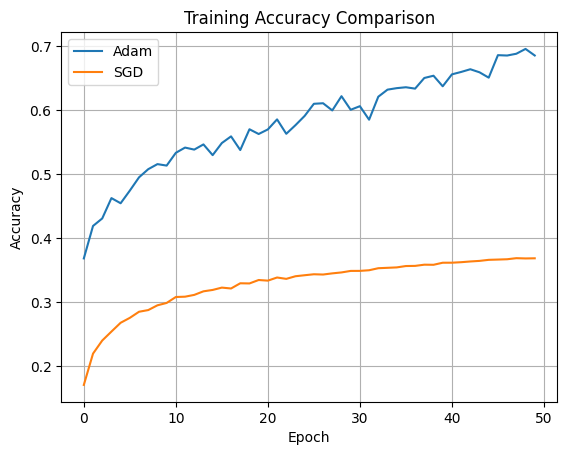

In [41]:
import numpy as np
import matplotlib.pyplot as plt  # matplotlib.pyplot 임포트 추가

plt.plot(train_acc1, label='Adam')
plt.plot(train_acc2, label='SGD')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
